<a href="https://colab.research.google.com/github/AabidMK/RealtyAI_Infosys_Internship_Aug2025/blob/main/EDA_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd

real_estate_v21 = pd.read_csv('/content/drive/MyDrive/infosys_internship/Real Estate Data V21.csv')
display(real_estate_v21.head())

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


In [29]:
display(real_estate_v21.info())
display(real_estate_v21.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14528 non-null  object 
 1   Property Title  14528 non-null  object 
 2   Price           14528 non-null  object 
 3   Location        14528 non-null  object 
 4   Total_Area      14528 non-null  int64  
 5   Price_per_SQFT  14528 non-null  float64
 6   Description     14528 non-null  object 
 7   Baths           14528 non-null  int64  
 8   Balcony         14528 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1021.6+ KB


None

,0
Name,0
Property Title,0
Price,0
Location,0
Total_Area,0
Price_per_SQFT,0
Description,0
Baths,0
Balcony,0


In [30]:
display(real_estate_v21.describe())

,Total_Area,Price_per_SQFT,Baths
count,14528.000000,14528.000000,14528.000000
mean,1297.916988,11719.456222,2.751239
std,1245.694305,49036.068632,0.898243
min,70.000000,0.000000,1.000000
25%,650.000000,4480.000000,2.000000
50%,1000.000000,6050.000000,3.000000
75%,1439.000000,9312.500000,3.000000
max,35000.000000,999000.000000,6.000000


In [31]:
#Basic Information
print("Shape of dataset:", real_estate_v21.shape)
print("\nColumn Data Types:\n", real_estate_v21.dtypes)
print("\nMissing Values:\n", real_estate_v21.isnull().sum())

Shape of dataset: (14528, 9)

Column Data Types:
 Name               object
Property Title     object
Price              object
Location           object
Total_Area          int64
Price_per_SQFT    float64
Description        object
Baths               int64
Balcony            object
dtype: object

Missing Values:
 Name              0
Property Title    0
Price             0
Location          0
Total_Area        0
Price_per_SQFT    0
Description       0
Baths             0
Balcony           0
dtype: int64


In [32]:
# Summary Statistics
real_estate_v21.describe()

,Total_Area,Price_per_SQFT,Baths
count,14528.000000,14528.000000,14528.000000
mean,1297.916988,11719.456222,2.751239
std,1245.694305,49036.068632,0.898243
min,70.000000,0.000000,1.000000
25%,650.000000,4480.000000,2.000000
50%,1000.000000,6050.000000,3.000000
75%,1439.000000,9312.500000,3.000000
max,35000.000000,999000.000000,6.000000


In [33]:
# Unique values in categorical columns
for col in real_estate_v21.select_dtypes(include="object").columns:
    print(f"{col}: {real_estate_v21[col].nunique()} unique values")

Name: 9998 unique values
Property Title: 6507 unique values
Price: 891 unique values
Location: 7050 unique values
Description: 14490 unique values
Balcony: 2 unique values


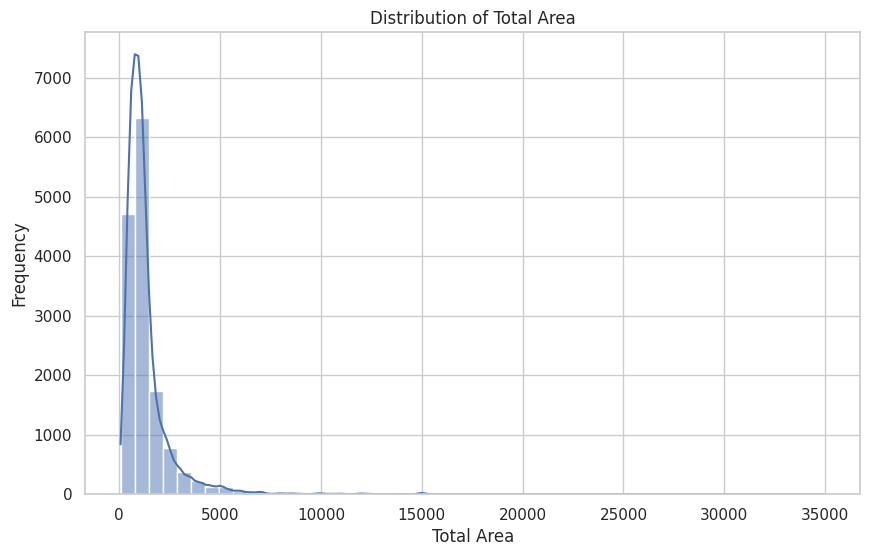

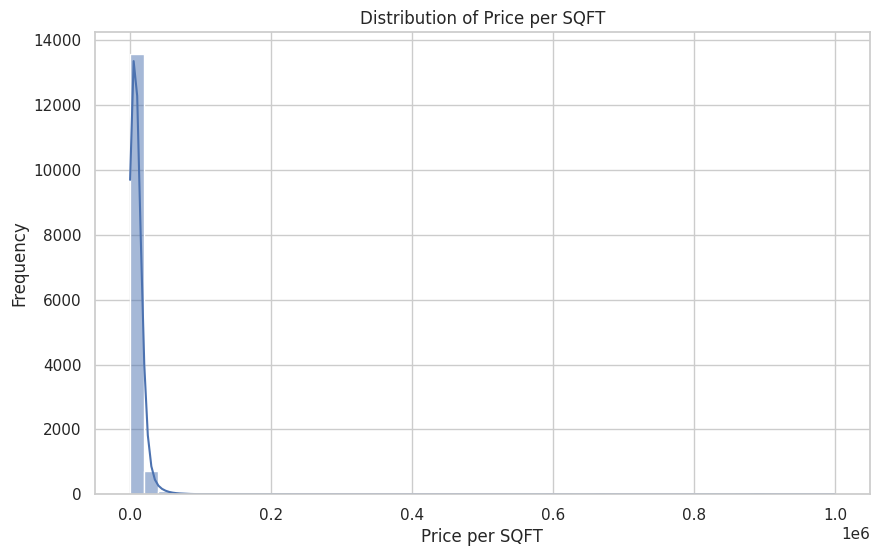

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(real_estate_v21['Total_Area'], bins=50, kde=True)
plt.title('Distribution of Total Area')
plt.xlabel('Total Area')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(real_estate_v21['Price_per_SQFT'], bins=50, kde=True)
plt.title('Distribution of Price per SQFT')
plt.xlabel('Price per SQFT')
plt.ylabel('Frequency')
plt.show()

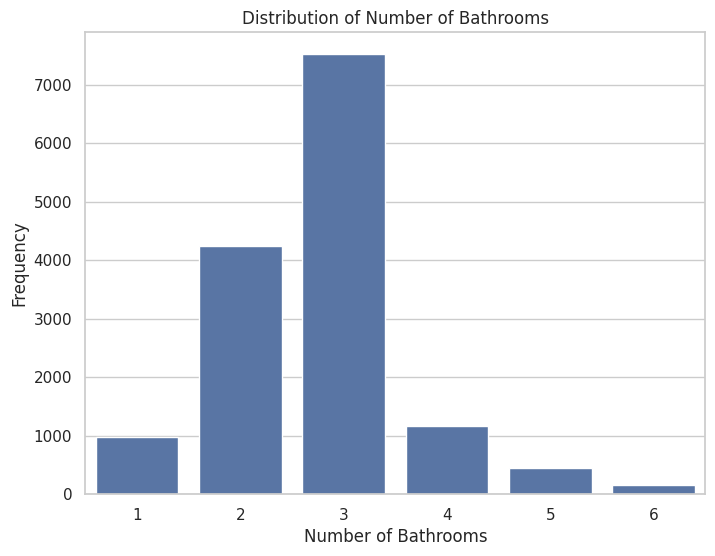

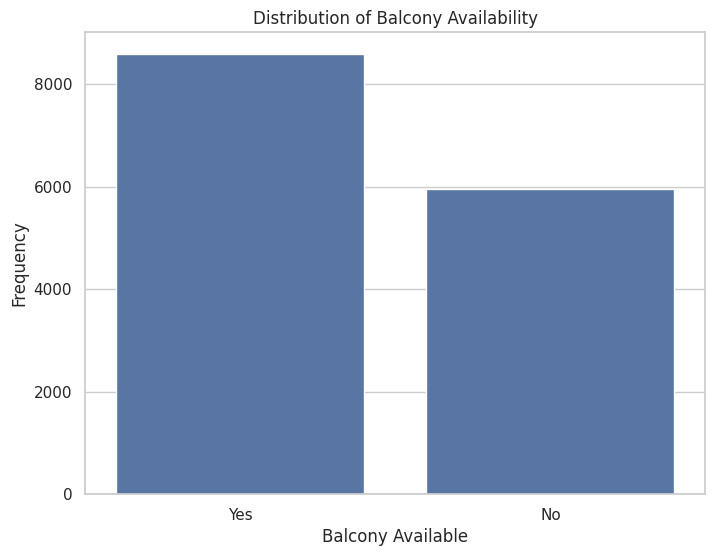

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(data=real_estate_v21, x='Baths')
plt.title('Distribution of Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=real_estate_v21, x='Balcony')
plt.title('Distribution of Balcony Availability')
plt.xlabel('Balcony Available')
plt.ylabel('Frequency')
plt.show()

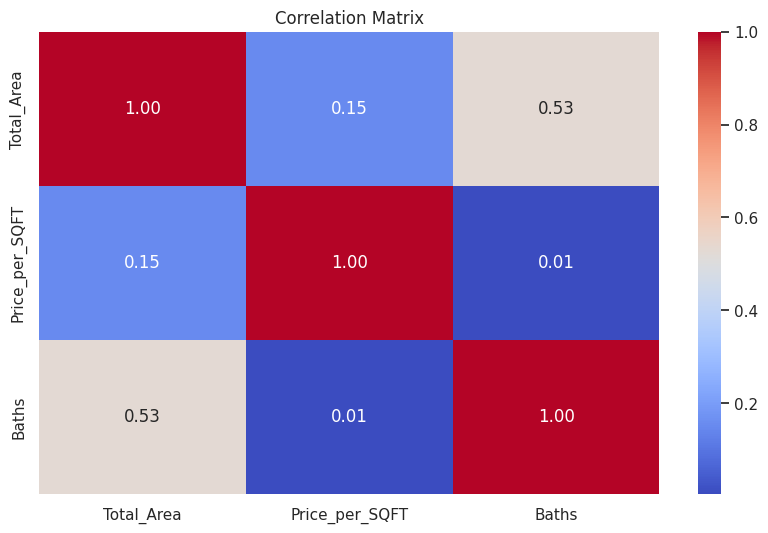

In [36]:
#Missing values heatmap
plt.figure(figsize=(10,6))
sns.heatmap(real_estate_v21.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

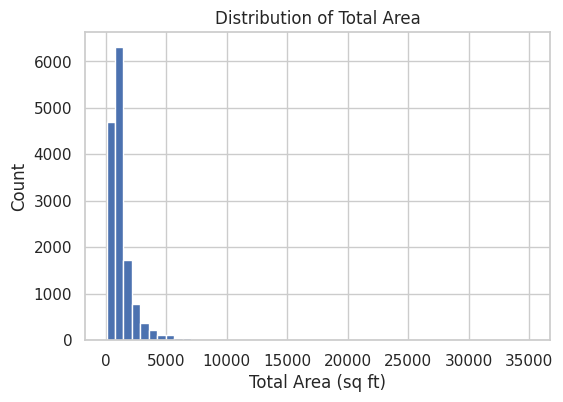

In [37]:
# Distribution of Total Area
real_estate_v21['Total_Area'].hist(bins=50, figsize=(6,4))
plt.title("Distribution of Total Area")
plt.xlabel("Total Area (sq ft)")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-3289541696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Baths", data=real_estate_v21, palette="viridis")


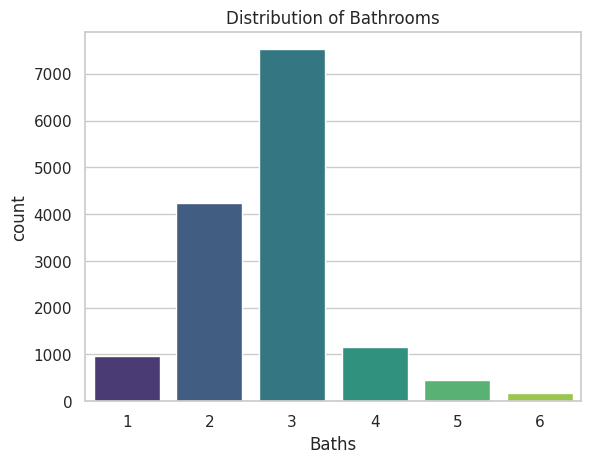

In [38]:
# Countplot for number of bathrooms
sns.countplot(x="Baths", data=real_estate_v21, palette="viridis")
plt.title("Distribution of Bathrooms")
plt.show()

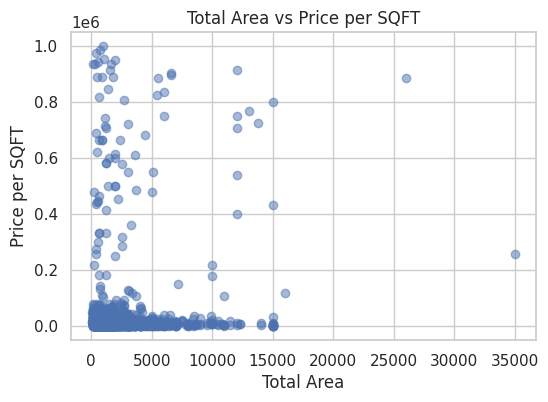

In [39]:
# Scatter plot between Area and Price per SQFT
plt.figure(figsize=(6,4))
plt.scatter(real_estate_v21['Total_Area'], real_estate_v21['Price_per_SQFT'], alpha=0.5)
plt.title("Total Area vs Price per SQFT")
plt.xlabel("Total Area")
plt.ylabel("Price per SQFT")
plt.show()

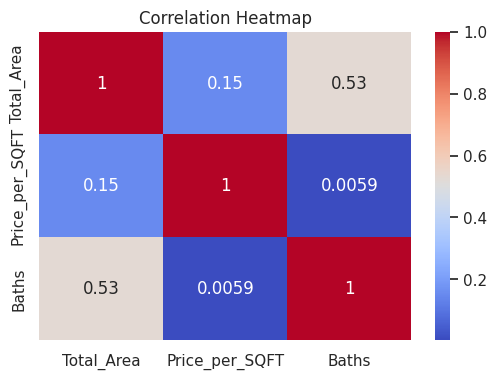

In [40]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(real_estate_v21.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipython-input-93326414.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="mako")


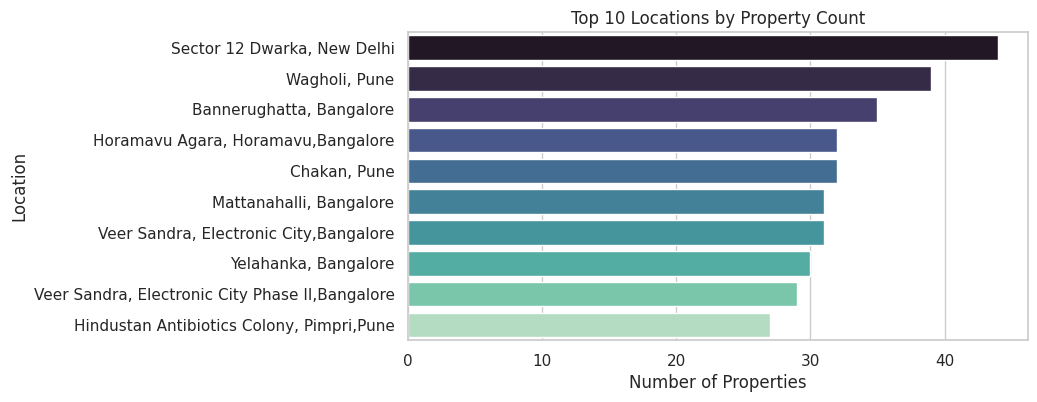

In [41]:
#Location Analysis (Top 10 Locations)
top_locations = real_estate_v21['Location'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="mako")
plt.title("Top 10 Locations by Property Count")
plt.xlabel("Number of Properties")
plt.ylabel("Location")
plt.show()